# Network Visualisation

In [3]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# Function to change directory. Please adjust your 'base' accordingly. 

def change_dir (target):
    base = '\\Users\\peace\\Documents\\GitHub\\CryptocurrencyAnalysis'
    if target == 'base':
        os.chdir(base)
    elif target == 'Follower_id':
        os.chdir(base + '\\Data\\Twitter_Data\\' + target)
    elif target == 'data':
        os.chdir(base + '\\' + target)

In [5]:
# changing working directory

print("current working directory", os.getcwd())
change_dir('Follower_id')
print("current working directory", os.getcwd())

current working directory c:\Users\peace\Documents\GitHub\CryptocurrencyAnalysis\Scripts
current working directory c:\Users\peace\Documents\GitHub\CryptocurrencyAnalysis\Data\Twitter_Data\Follower_id


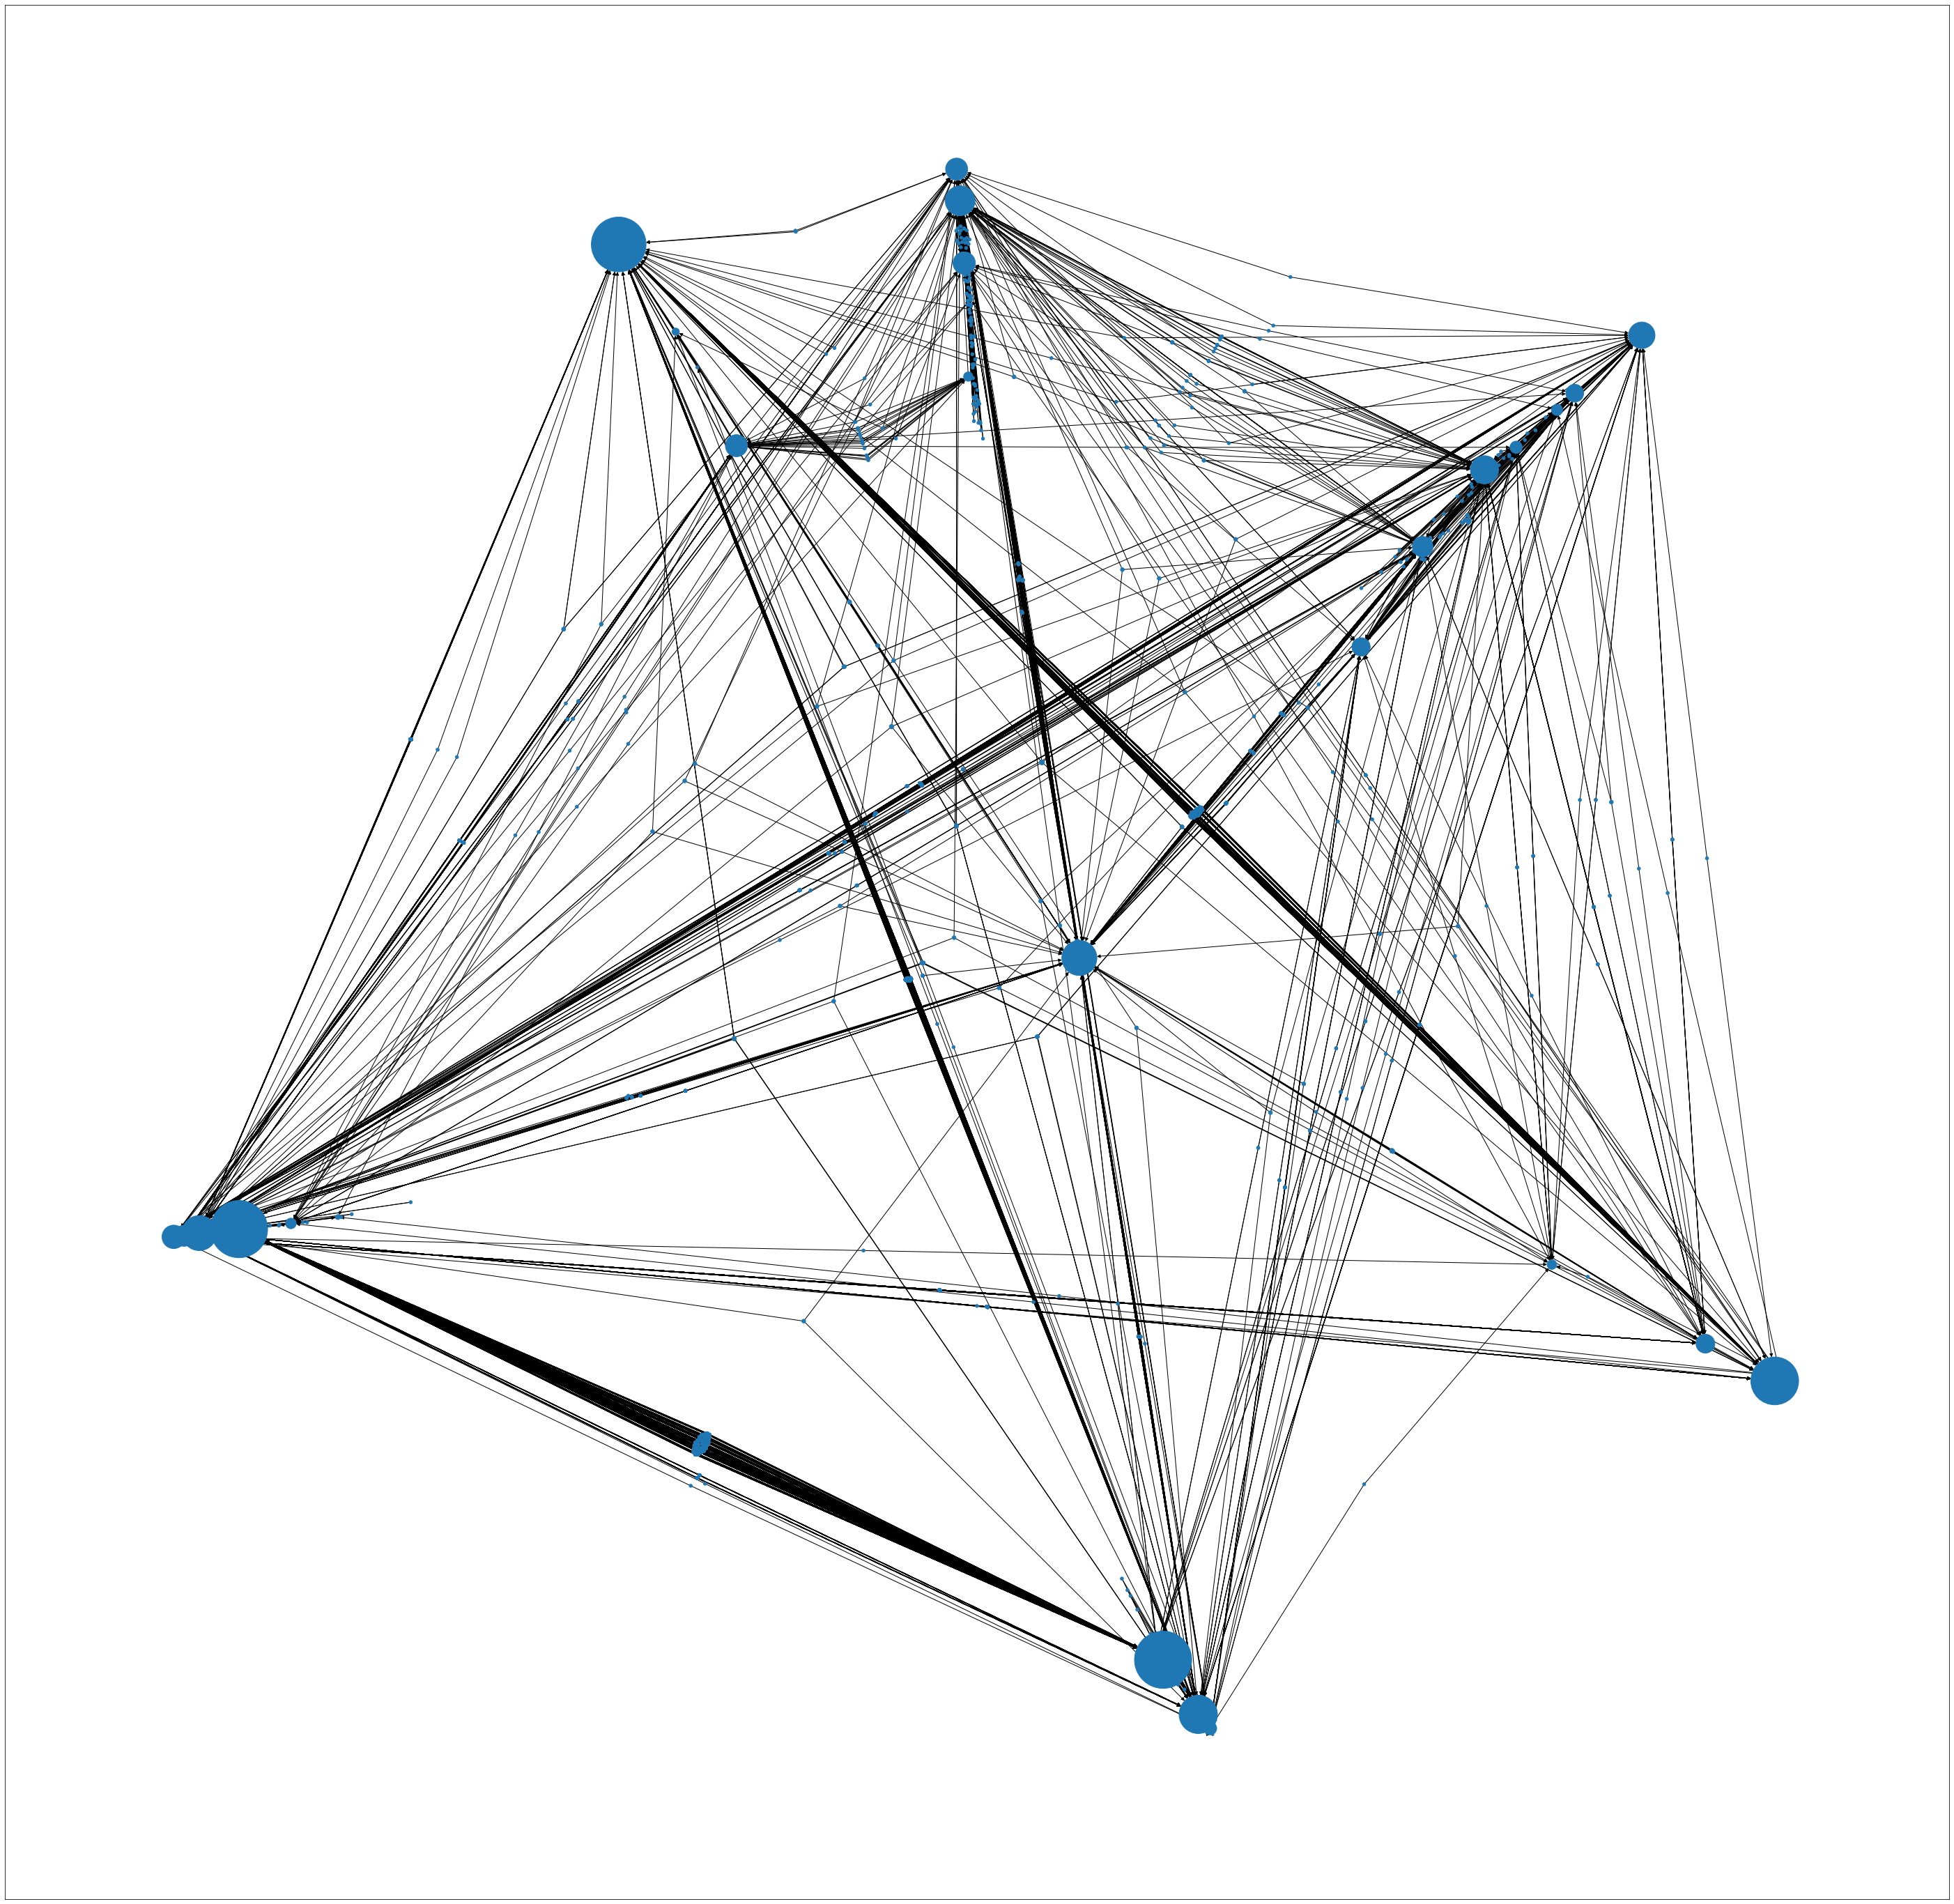

In [23]:
# no labels
edges = pd.read_csv('ALL Level 0-1-2 Follower IDs.txt', sep=',', header=None)
edges.columns = ['Source', 'Target']
dg = nx.from_pandas_edgelist(edges, 'Target', 'Source', create_using = nx.DiGraph())

remove = [node for node,degree in dict(dg.degree()).items() if degree < 2]
dg.remove_nodes_from(remove)

d = dict(dg.degree)
d

f = plt.figure(figsize=(50,50))
# nx.draw_networkx(G, nodelist = d.keys(), node_size = [v*10 for v in d.values()], with_labels=False)
pos = nx.spring_layout(dg)
nx.draw_networkx(dg, pos, node_size = [v*10 for v in d.values()], with_labels=False)
plt.show()
# nx.draw_networkx(dg, pos, nodelist = d.keys(), node_size = [v*10 for v in d.values()], with_labels=False)
# plt.show()

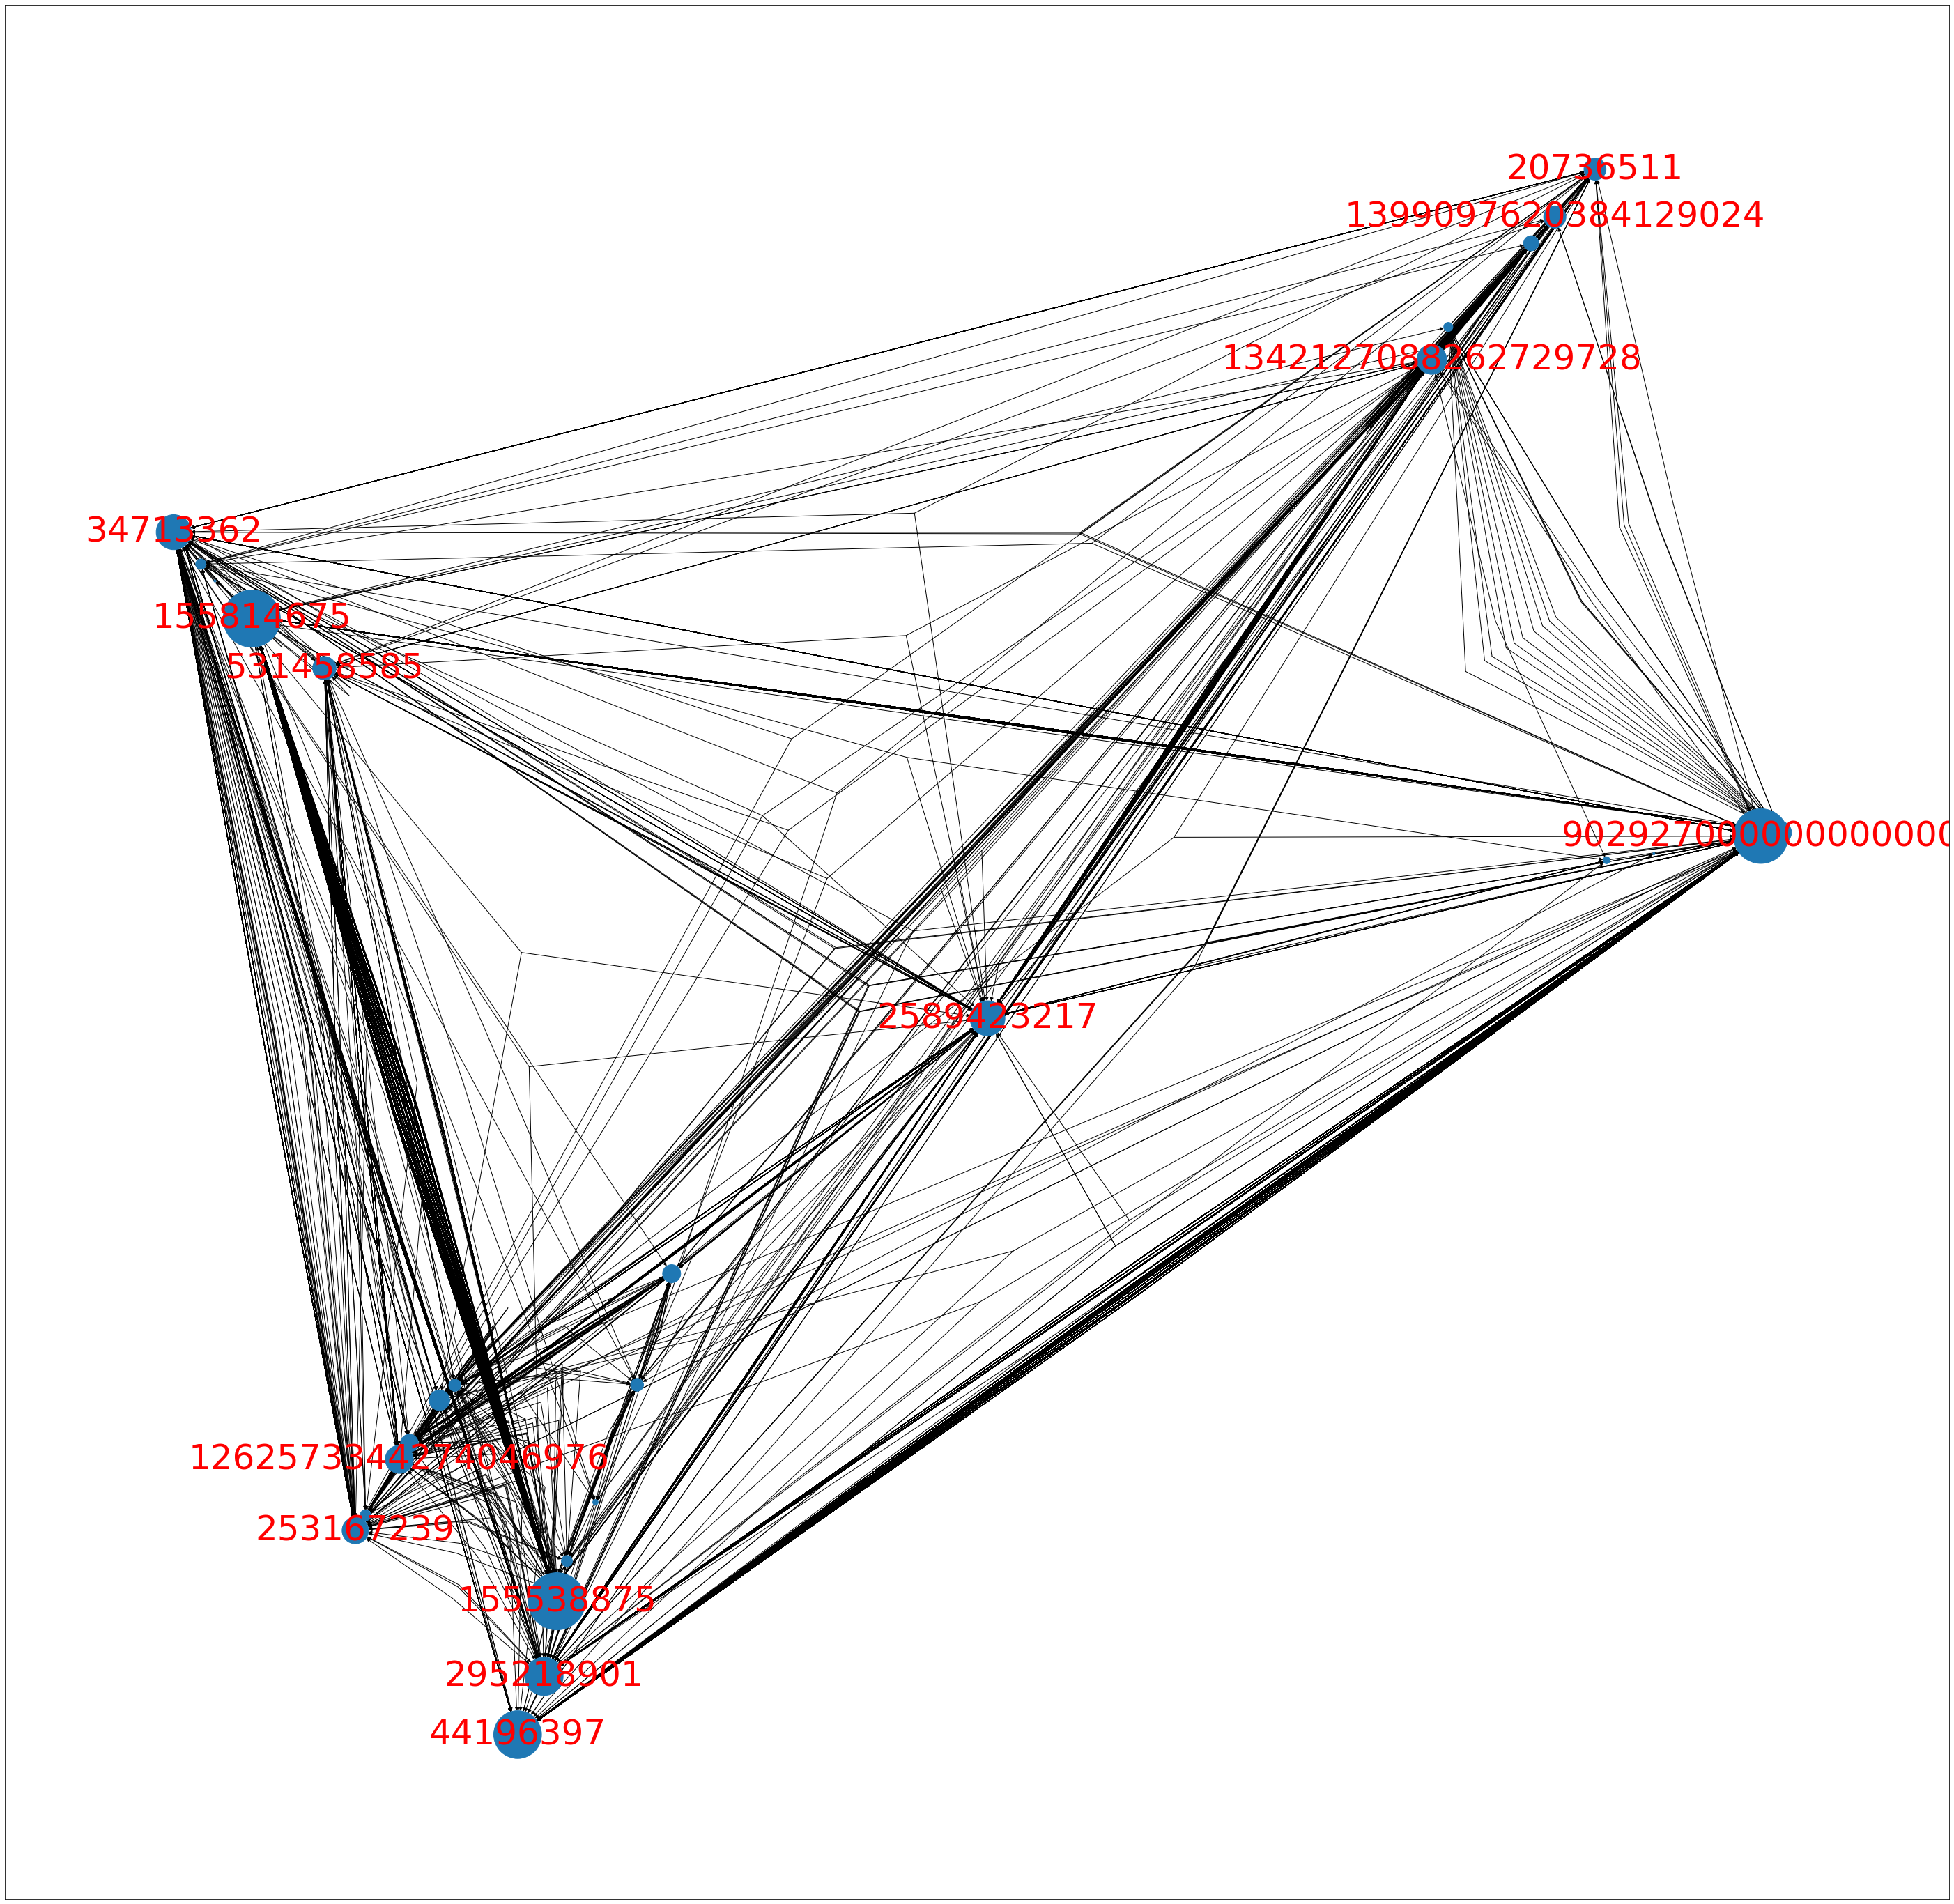

In [11]:
# with labels
edges = pd.read_csv('ALL Level 0-1-2 Follower IDs.txt', sep=',', header=None)
edges.columns = ['Source', 'Target']
dg = nx.from_pandas_edgelist(edges, 'Target', 'Source', create_using = nx.DiGraph())

remove = [node for node,degree in dict(dg.degree()).items() if degree < 2]
dg.remove_nodes_from(remove)

d = dict(dg.in_degree)
d

labels = {}    
for keys, values in d.items():
    if values >= 100:
        labels[keys] = keys

f = plt.figure(figsize=(50,50))
# nx.draw_networkx(G, nodelist = d.keys(), node_size = [v*10 for v in d.values()], with_labels=False)
pos = nx.spring_layout(dg)
nx.draw_networkx(dg, pos, node_size = [v*10 for v in d.values()], with_labels=False)
nx.draw_networkx_labels(dg,pos,labels,font_size=50,font_color='Red')
plt.show()
# nx.draw_networkx(dg, pos, nodelist = d.keys(), node_size = [v*10 for v in d.values()], with_labels=False)
# plt.show()

In [5]:
edges = pd.read_csv('ALL Level 0-1-2 Follower IDs.txt', sep=',', header=None)
edges.columns = ['Source', 'Target']
dg = nx.from_pandas_edgelist(edges, 'Target', 'Source', create_using = nx.DiGraph())

remove = [node for node,degree in dict(dg.degree()).items() if degree < 2]
dg.remove_nodes_from(remove)

d = dict(dg.in_degree)
d

high = {}

for keys, values in d.items():
    if values >= 100:
        high[keys] = values

print (high)

{44196397: 470,
 1527578292928540673: 0,
 1527578264541495296: 0,
 1527578281410797569: 0,
 1527578241984352257: 0,
 1527576114050236416: 0,
 1527578379805151232: 0,
 1527578196262404096: 0,
 1527578209595842562: 0,
 1527578547614670849: 0,
 1527577773807632384: 0,
 1527577767680024577: 0,
 1527578139756478465: 0,
 1527578180764192768: 0,
 1527578145133568000: 0,
 1527578114888458241: 0,
 1527578109503062016: 0,
 1527578055996329989: 0,
 1527577027066449920: 0,
 1517181210786951173: 0,
 1527578047381221376: 0,
 1527578006004301826: 0,
 915569660552208385: 0,
 1527565648720805890: 0,
 1527577953571201025: 0,
 1527577947007229953: 0,
 1527577936533934080: 0,
 1527578046689050624: 0,
 1527577919484071937: 0,
 1522754907442491394: 0,
 1527577880284352513: 0,
 1527577872667332608: 0,
 1527577804694601729: 0,
 1527577830082617345: 0,
 1527577798977921025: 0,
 1527577810948194307: 0,
 1527577658476797952: 0,
 1527576928596672512: 0,
 1486292708482498560: 0,
 1527577772276830209: 0,
 152757773

In [29]:
import oauth2 as oauth
from twitter_config import *

consumer = oauth.Consumer(key = consumer_key, secret = consumer_secret)
access_token = oauth.Token(key = access_token, secret = access_token_secret)
client = oauth.Client(consumer, access_token)

import simplejson as json
from twitter_wrapper import *

In [30]:
liss = []

for keys in high:
    liss.append(keys)

print(liss)

[44196397, 295218901, 155538875, 2589423217, 20736511, 1342127088262729728, 1399097620384129024, 902927000000000000, 24496196, 253167239, 1262573344274046976, 34713362, 155814675, 531458585]


In [41]:
success, result = twitter_api('users/lookup.json?user_id='+ '44196397, 295218901, 155538875, 2589423217, 20736511, 1342127088262729728, 1399097620384129024, 902926941413453824, 24496196, 253167239, 1262573344274046976, 34713362, 155814675, 531458585')
# can supply multiple screen names, up to 100, separated by a comma
# sucess = status (200)

# below is just printing out various fields of the queried screen names in a tabulated form
print('%-20s%-20s%-20s%-20s%s' % ('SCREEN', 'ID', 'LOCATION', '#FOLLOWERS', 'DESCRIPTION'))
print('-'*100)
for res in result: # assumes sucess
    screen = res['screen_name']
    id = res['id_str']
    loc = res['location']
    follower_count = res['followers_count']
    desc = res['description'][:40]
    print('%-20s%-20s%-20s%-20s%s' % (screen, id, loc, follower_count, desc))

waiting for request users/lookup.json
done
SCREEN              ID                  LOCATION            #FOLLOWERS          DESCRIPTION
----------------------------------------------------------------------------------------------------
elonmusk            44196397                                98760376            
VitalikButerin      295218901           Earth               4016036             Ethereum

Fable of the Dragon Tyrant (no
Victor_eth0x        155538875                               3705                Crypto promote: https://t.co/RB3AKaLRRi

AltcoinWorldcom     2589423217          Metaverse           75565               🐋Gem Finder - Lowcap Alt hunter OHM FORK
nayibbukele         20736511            El Salvador         4016534             El Presidente
Brass_Statement     1342127088262729728                     68020               #Brass_Exchange #BRASS #BNB #BTC
JoseAMtnzRivera     1399097620384129024 Los Mochis, Sinaloa.31061               Lic. Desarrollo Empresarial y de 